In [5]:
# import the preprocessing functions 
import preprocess

In [20]:
from time import time
import pandas as pd 

import matplotlib.pyplot as plt
import scikitplot as skplt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [12]:
# import the dataset and select a subset
df = pd.read_csv('../data/task1_dataset.csv').drop(columns = 'Unnamed: 0')

df

,label,text
0,0,"""My Thistle subscription has changed my work f..."
1,0,"After I bought this toy for my child, he staye..."
2,0,A Black Friday purchase you actually won't reg...
3,0,"The Nutcracker, accompany you and your family ..."
4,0,ohora’s NEW COLLECTION - shop right away https...
...,...,...
14931,1,"The effects of CBD are highly personalized, bu..."
14932,0,"It's giveaway time! Want to win $1,000 cash + ..."
14933,1,The time for action is NOW Tell your legislato...
14934,0,"This is a simple small school bag, you can car..."


In [13]:
# perform data pre-processing
df['preprocessed'] = preprocess.preprocess_data(df['text'])
df.head()

,label,text,preprocessed
0,0,"""My Thistle subscription has changed my work f...",thistle subscription changed work home life sa...
1,0,"After I bought this toy for my child, he staye...",bought toy child stayed away ipadtablet tv pro...
2,0,A Black Friday purchase you actually won't reg...,black friday purchase actually wont regret sto...
3,0,"The Nutcracker, accompany you and your family ...",nutcracker accompany family warm holiday https...
4,0,ohora’s NEW COLLECTION - shop right away https...,ohora’s new collection shop right away httpsbi...


In [14]:
# split data (80% training / 20% test)
train,test=preprocess.eval_train_split(data = df['preprocessed'], labels = df['label'], validation=False)
X_train, y_train, X_test, y_test = train[0], train[1], test[0], test[1]


### Count vectorizer 

In [15]:
# loading CountVectorizer
tf_vectorizer = CountVectorizer() 
# transform texts to numerical values
X_train_tf = tf_vectorizer.fit_transform(X_train)

print("n_samples: %d, n_features: %d" % X_train_tf.shape)


n_samples: 11948, n_features: 29503


In [16]:
# transform texts to numerical values
X_test_tf = tf_vectorizer.transform(X_test)
print("n_samples: %d, n_features: %d" % X_test_tf.shape)

n_samples: 2988, n_features: 29503


In [ ]:
# train the multinomial naive bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tf,y_train)


accuracy:   0.913
               precision    recall  f1-score   support

   Commercial       0.91      0.92      0.91      1512
Informational       0.91      0.91      0.91      1476

     accuracy                           0.91      2988
    macro avg       0.91      0.91      0.91      2988
 weighted avg       0.91      0.91      0.91      2988

confusion matrix:
[[1387  125]
 [ 134 1342]]



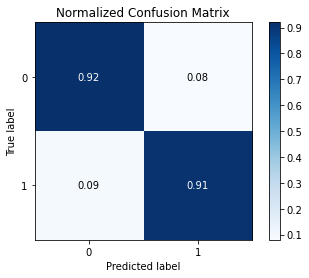

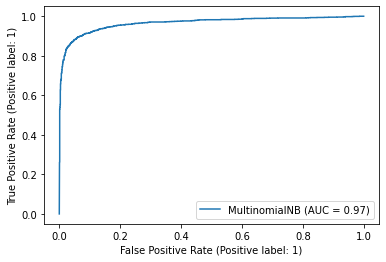

In [23]:
# predict data classes
y_pred = naive_bayes_classifier.predict(X_test_tf)

# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred, target_names=['Commercial', 'Informational']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))
print()
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

svc_disp = metrics.RocCurveDisplay.from_estimator(naive_bayes_classifier, X_test_tf, y_test)


### Tf-IDF vectorizer

In [ ]:
#load the term frequency vectorizer
tf_idf_vectorizer = TfidfVectorizer() 

X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)

print("n_samples: %d, n_features: %d" % X_train_tf_idf.shape)

In [ ]:
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

print("n_samples: %d, n_features: %d" % X_test_tf_idf.shape)

In [ ]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tf_idf,y_train)


In [ ]:
y_pred_idf = naive_bayes_classifier.predict(X_test_tf_idf)

In [ ]:
# compute the performance measures
score2 = metrics.accuracy_score(y_test, y_pred_idf)
print("accuracy:   %0.3f" % score2)

print(metrics.classification_report(y_test, y_pred_idf,
                                            target_names=['Inf', 'Com']))

print("confusion matrix:")


tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred_idf).ravel()

(tn, fp, fn, tp)